## Описание проекта

### Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

*План работы:*

1) Приоритизация гипотез

2) Анализ A/B-теста

3) Выводы по результатам работы

## Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option("max_colwidth", 100)
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


*Для расчета фреймворка ICE будем использовать данную формулу его вычисления:*

$$ICE=\frac{𝐼𝑚𝑝𝑎𝑐𝑡∗𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒}{𝐸𝑓𝑓𝑜𝑟𝑡𝑠}$$

In [2]:
#приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

#применим фреймворк ICE и отсортируем гипотезы по убыванию приоритета.
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
data = pd.DataFrame()
data['hypothesis'] = hypothesis['hypothesis']
data['ICE'] = hypothesis['ICE']
data = data.sort_values(by='ICE', ascending = False)
pd.set_option("max_colwidth", 100)
data


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Для расчета фреймворка ICE будем использовать данную формулу его вычисления:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


In [3]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
data = pd.DataFrame()
data['hypothesis'] = hypothesis['hypothesis']
data['RICE'] = hypothesis['RICE']
data = data.sort_values(by='RICE', ascending = False)
pd.set_option("max_colwidth", 100)
data

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


*Изменилась приоритизация гипотез при применении RICE вместо ICE. Это произошло по причине того, что в RICE добавлен еще один компонент - Confidence, показывающий уверенность в оценке охвата, влияния и трудозатрат. Если мы считаем, что изменение может иметь огромное влияние, но у нас нет данных для доказательства этого, Confidence позволяет проконтролировать этот момент.*

*Стоит отметить, что 4я гипотеза не изменила позицию, а первая четверка изменилась, выбиа 8ю гипотизу на пятое место. 7я стала лидировать из-за большего параметра Reach.*

## Анализ A/B-теста

### Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Теепрь необходимо проанализировать A/B-тест:

#### Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
#проверим типы данных таблицы, а также пропуски 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
#узнаем, есть ли дубликаты
orders.duplicated().sum()

0

In [7]:
#выясним, как распределены группы 
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors.duplicated().sum()

0

In [11]:
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

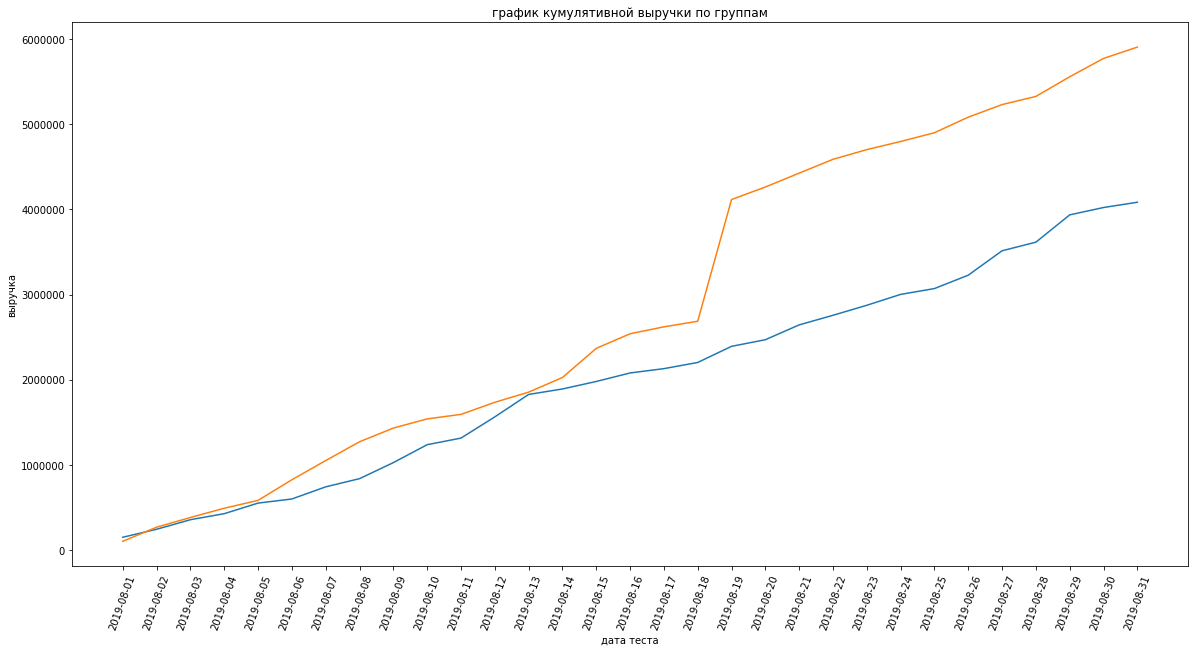

In [12]:
plt.figure(figsize=(20,10))

#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#соберём агрегированные кумулятивные по дням данные о заказах и посетителях
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('график кумулятивной выручки по группам')
plt.xlabel('дата теста')
plt.ylabel('выручка')
degrees = 70
plt.xticks(rotation=degrees)
plt.show()


*После начала теста, группа В вырывается вперед и продолжает лидировать до окончания тестирования. В середине у обоих групп заметны резкие выручки. Это может сигнализировать о выбросах, обусловленных большими чеками и большим числом заказов.*

#### Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

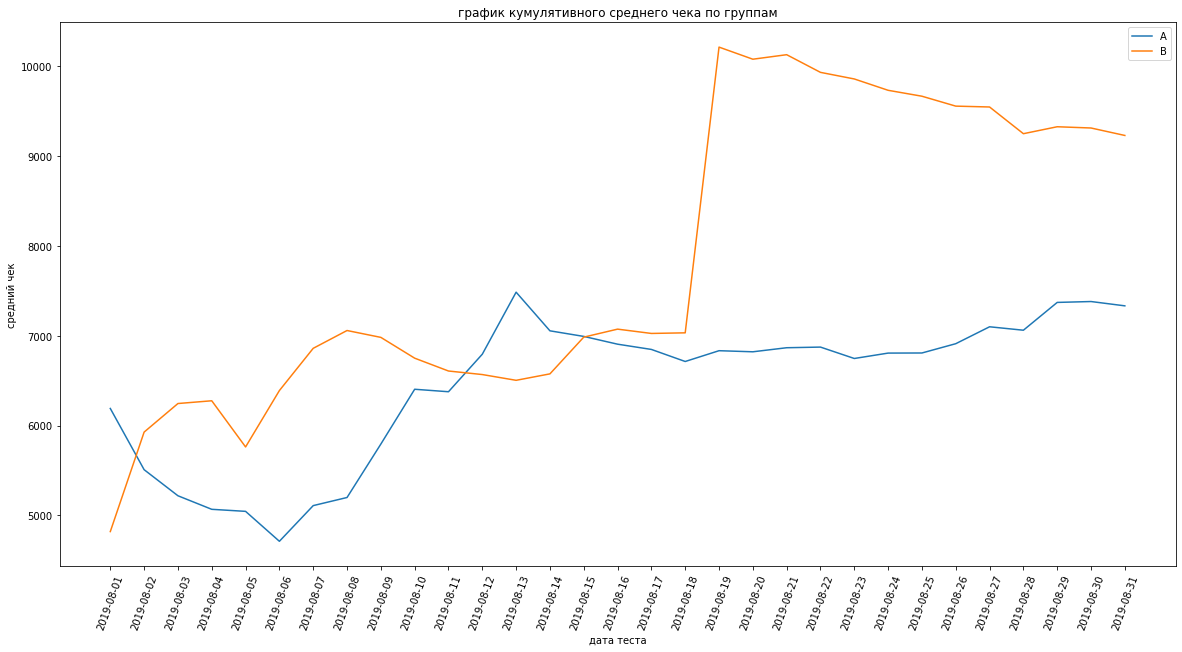

In [13]:
plt.figure(figsize=(20,10))

#разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('график кумулятивного среднего чека по группам')
plt.xlabel('дата теста')
plt.ylabel('средний чек')
degrees = 70
plt.xticks(rotation=degrees)
plt.legend();

*Колебание кумулятивного среднечго чека сопровождается по всей длине теста. Также виден резкий рост в группе В. Можно предположить, что в это время произошли те самые дорогие покупки или несколько больших чеков. Группа А приходит  в норму по окончанию теста.*

#### Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

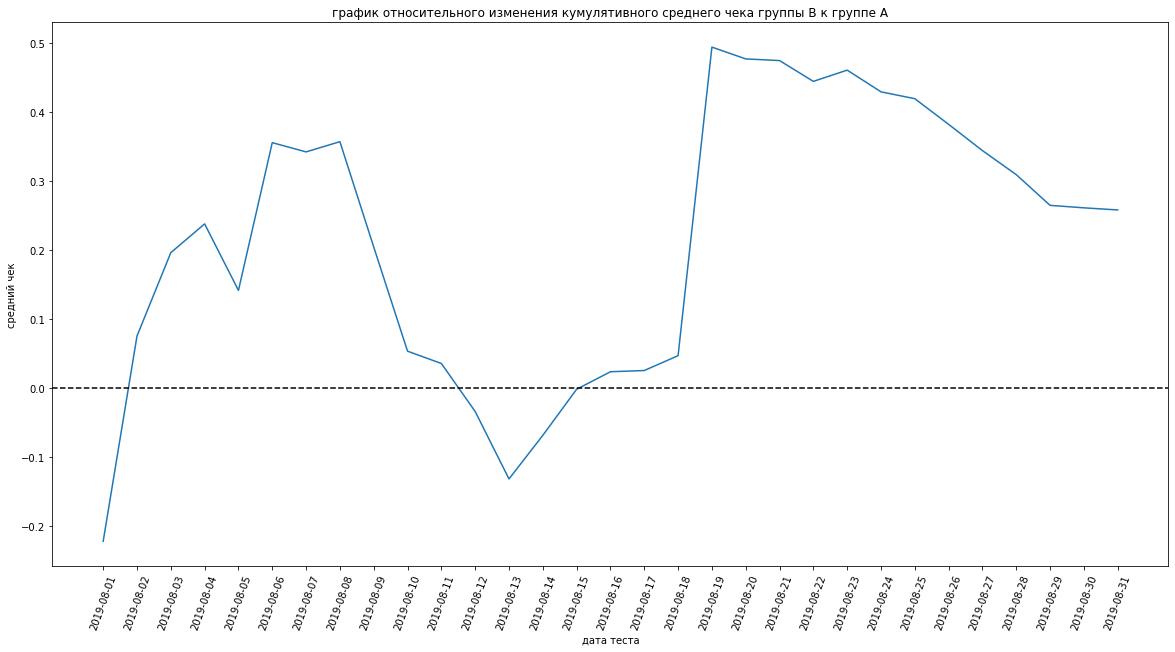

In [14]:
plt.figure(figsize=(20,10))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата теста')
plt.ylabel('средний чек')
degrees = 70
plt.xticks(rotation=degrees)
plt.show();

*Колебание относительного изменения кумулятивного среднего чека группы B в большей части теста происходит в положительной зоне. В нескольких точках график различия между сегментами резко меняется, что указывает на выбросы.*

#### Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.

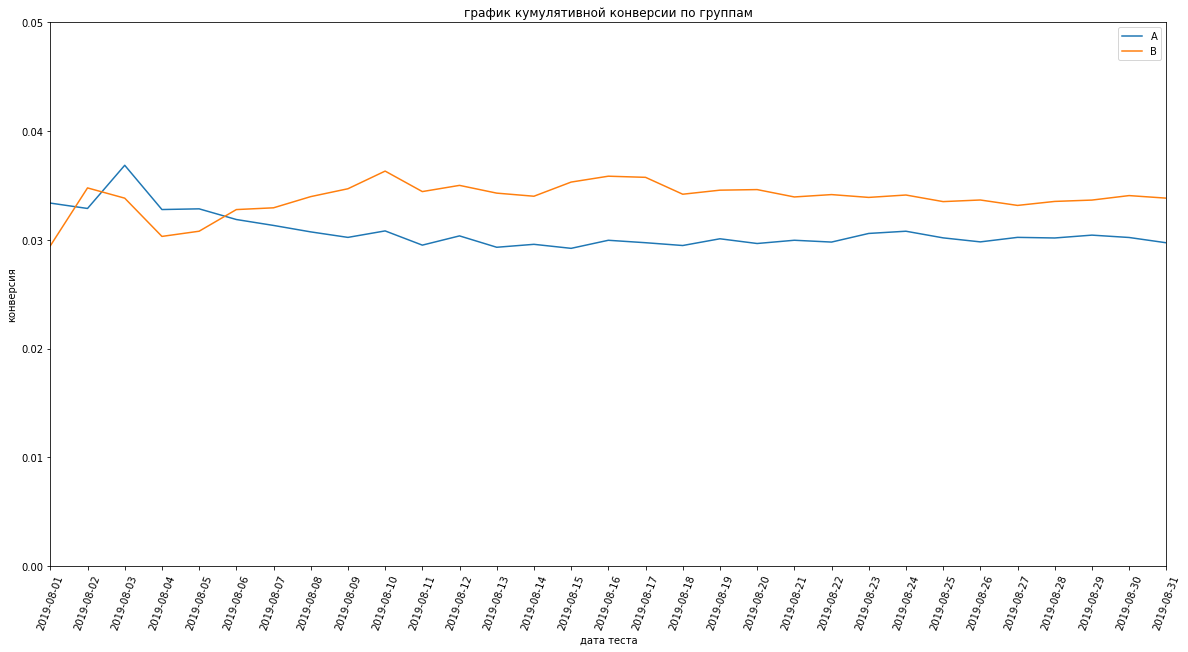

In [15]:
plt.figure(figsize=(20,10))


# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 
plt.title('график кумулятивной конверсии по группам')
plt.xlabel('дата теста')
plt.ylabel('конверсия')
degrees = 70
plt.xticks(rotation=degrees)
plt.legend();

*Колебание конверсий двух групп от 3% до 4%. Группы колебались в начале теста, но позже значения были выровнены, а конверсия группы В вырвалась вперед и зафиксировалась, фиксирование группы А было установленно в это же время.*

#### Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

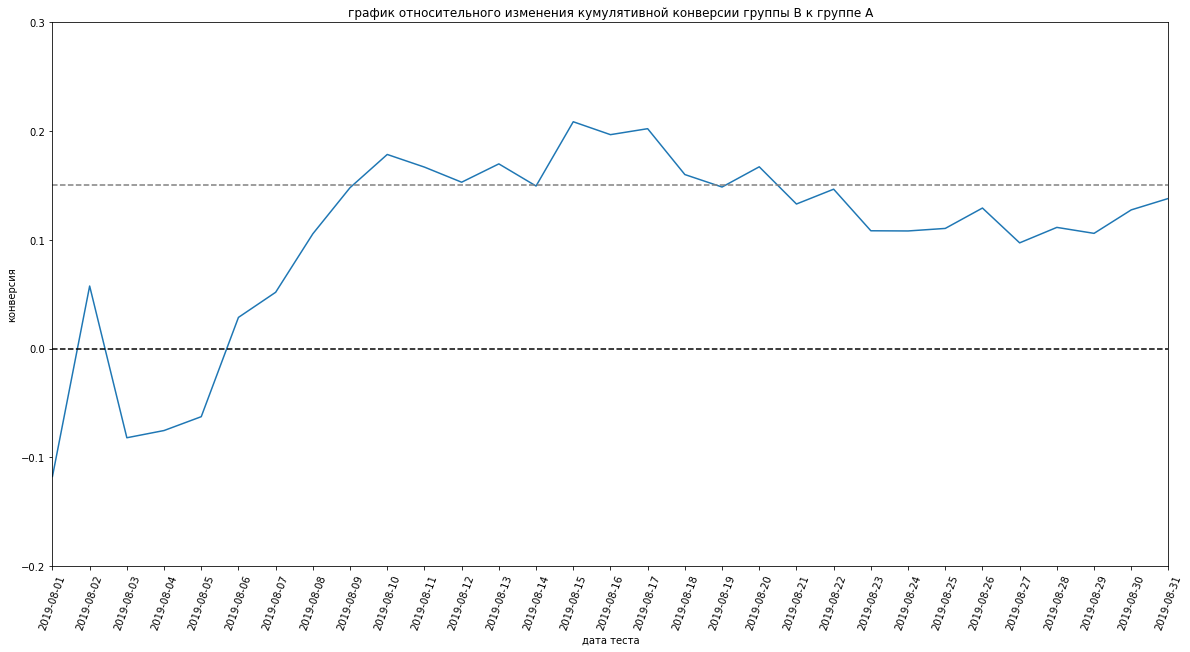

In [16]:
plt.figure(figsize=(20,10))

#объеденим таблицы с данными о кумулятивных данных групп по дате и конверсии
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('дата теста')
plt.ylabel('конверсия')
degrees = 70
plt.xticks(rotation=degrees)
plt.show();

*В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд, удерживая высокую конверсию 10-20%.*

#### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

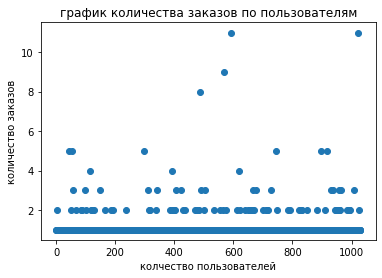

In [17]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('график количества заказов по пользователям')
plt.xlabel('колчество пользователей')
plt.ylabel('количество заказов')
plt.show();

*Пользователей,заказавших больше двух раз, очень мало. Они вполне могут быть аномальными.*

#### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей

In [18]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

*Перцентили указывают на то, что не более 5% пользователей совершали более двух заказов. Это подтверждает вывод на основе графика выше. 1% пользователей совершали больше четырех заказов. Выберем два заказа на одного пользователя за нижнюю границу числа заказов, и отсеем аномальных пользователей по ней.*

#### Построить точечный график стоимостей заказов. Сделать выводы и предположения.

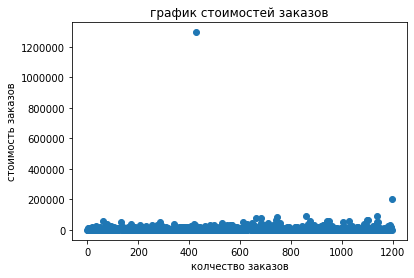

In [19]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('график стоимостей заказов')
plt.xlabel('колчество заказов')
plt.ylabel('стоимость заказов')
plt.show();

*Заказов больше 100000 всего два - это и есть выбросы.*

#### Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов

In [20]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

*Перцентили указывают на то, что не более 5% пользователей чек выше 28000. 1% пользователей совершали покупку больше, чем на 58234. Выберем 28000 за нижнюю границу стоимости заказов, и отсеем аномальных пользователей по ней.*

#### Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

Н_0: Конверсия группы А = Конверсии группы В

Н_1: Конверсия группы А != Конверсии группы В

In [21]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA',]

ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'} ),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB',]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.00840
0.138


*p-value меньше 0.05, поэтому отвергаем нулевую гипотезу. Анализ сообщает, что в конверсии между группами есть статистически значимые различия. Прирост конверсии группы В равен 13.8%*

#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Н_0: Средний чек группы А = Средний чек группы В

Н_1: Средний чек группы А != Средний чек группы В

In [22]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


*p-value больше 0.05, поэтому отвергнуть нулевую гипотезу мы не можем. Анализ сообщает, что статистически значимых различий между средними чеками групп нет. Относительное различие в среднем чеке 25.9%*

#### Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

Н_0: Конверсия группы А = Конверсии группы В

Н_1: Конверсия группы А != Конверсии группы В

In [23]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],],axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,) 

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00652
0.173


*Как и с сырыми данными, p-value меньше 0.05, поэтому отвергаем нулевую гипотезу. Анализ сообщает, что в конверсии между группами есть статистически значимые различия. Прирост конверсии группы В равен 17.3%, что на 3.5% больше.*

#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Н_0: Средний чек группы А = Средний чек группы В

Н_1: Средний чек группы А != Средний чек группы В

In [24]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

0.369
-0.020


*p-value увеличился, поэтому отвергнуть нулевую гипотезу мы снова не можем. Анализ сообщает, что статистически значимых различий между средними чеками групп нет. Но также стоит отметить, разница между сегментами сократилась с 25.9% до 2%. Это означает, что аномальные значени и выбросы составляют 24% данных при данном А/В-тесте.*

#### Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

*Итоги, полученные по результатам анализа, указывают:*

*- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий*

*- По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.*

*- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: выросли, а позже зафиксировались около среднего значения.*

*- График различия среднего чека колеблется, благодаря ему удалось найти аномалии. Сделать из этого графика определённые выводы нельзя.*

*По моему мнению, принимая во внимание все вышеуказанные данные, остановить тест, зафиксировать победу группе В*

## Вывод по результатам работы

После изучения кумулятивных данных, по центральной предельной теореме метрика устанавливается около некоторого среднего, что исключает проблему подсматривания. 

Большая часть аномалий при выявлении среднего чека, я считаю, свидетельствует об неоднородности покупателей в конце летнего сезона. Так как не знаю предмет продажи в анализируемом магазине, то не могу с полной уверенностью сообщить - это связано с количеством чеков или суммой в чеке.